In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [2]:
folder_path = os.getcwd()
model_path = os.path.join(folder_path, "mnist-original.mat")

In [3]:
mnist_raw = loadmat(model_path)

In [4]:
mnist={
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}

In [5]:
X=mnist["data"]
y=mnist["target"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

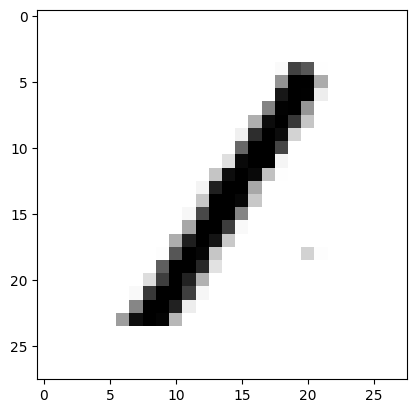

In [7]:
number = X[10000]
number_image = number.reshape(28,28)
plt.imshow(number_image,cmap=plt.cm.binary,interpolation="nearest")
plt.show()

In [8]:
X_train = X_train.astype('float32') / 255.0
x_train = X_train.reshape(-1, 28, 28)

X_test = X_test.astype('float32') / 255.0
x_test = X_test.reshape(-1, 28, 28)

In [9]:
import tensorflow as tf

In [10]:

def build_model(my_learning_rate):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(784,)),  # แปลง input 2D เป็น 1D
        tf.keras.layers.Dense(units=128, activation='relu'),  # เพิ่ม hidden layer
        tf.keras.layers.Dense(units=10, activation='softmax')  # output layer สำหรับ 10 classes
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model   

In [11]:
import pandas as pd
def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)
  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["accuracy"]
  print("Finished training the model.")
  print("Epochs trained: {}".format(epochs))
  print(history.history.keys())
  return trained_weight, trained_bias, epochs, rmse , history , model

print("Defined build_model and train_model")

Defined build_model and train_model


In [12]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""
    if len(feature) != len(label):
        min_size = min(len(feature), len(label))
        feature = feature[:min_size]
        label = label[:min_size]
        print(f"Resized feature and label to size: {min_size}")

    plt.xlabel("feature")
    plt.ylabel("label")
    plt.scatter(feature, label)

    # คำนวณเส้นตรงจาก weight และ bias
    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')
    plt.show()

def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [13]:
print(f"Feature size: {len(X_train)}, Label size: {len(y_train)}")


Feature size: 56000, Label size: 56000


In [14]:
learning_rate = 1e-100
epochs = 10
my_batch_size = 64

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse , history, model = train_model(my_model, X_train, y_train, epochs, my_batch_size)

Epoch 1/10


d:\Anaconda\envs\Deep-l\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8516 - loss: 0.5262
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9550 - loss: 0.1562
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9691 - loss: 0.1058
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9778 - loss: 0.0753
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9825 - loss: 0.0608
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9864 - loss: 0.0471
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9881 - loss: 0.0403
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9911 - loss: 0.0302
Epoch 9/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9932 - loss: 0.0256
Epoch 10/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9945 - loss: 0.0204
Finished training the model.
Epochs trained: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
dict_keys(['accuracy', 'loss'])


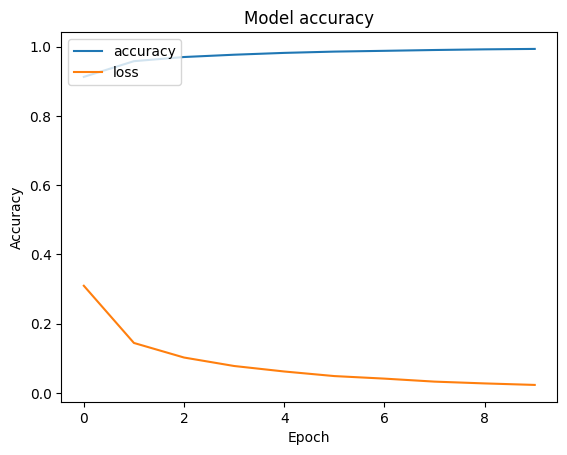

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


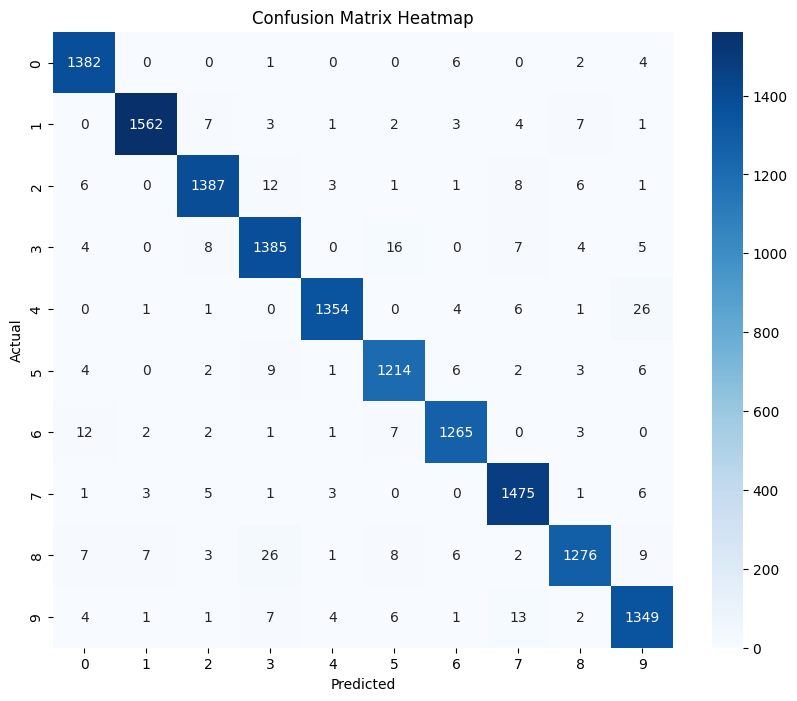

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9732    0.9907    0.9819      1395
         1.0     0.9911    0.9824    0.9867      1590
         2.0     0.9795    0.9733    0.9764      1425
         3.0     0.9585    0.9692    0.9638      1429
         4.0     0.9898    0.9720    0.9808      1393
         5.0     0.9681    0.9735    0.9708      1247
         6.0     0.9791    0.9783    0.9787      1293
         7.0     0.9723    0.9866    0.9794      1495
         8.0     0.9778    0.9487    0.9630      1345
         9.0     0.9588    0.9719    0.9653      1388

    accuracy                         0.9749     14000
   macro avg     0.9748    0.9747    0.9747     14000
weighted avg     0.9750    0.9749    0.9749     14000



In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


y_pred = my_model.predict(X_test).argmax(axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Calculate the classification report
class_report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:")
print(class_report)

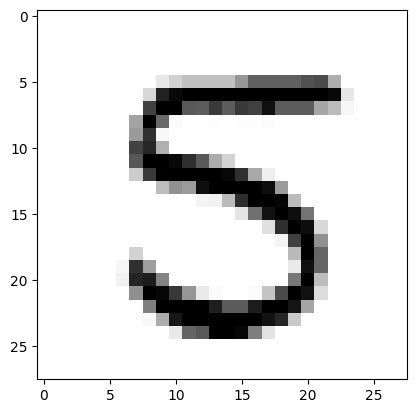

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted label: 5


In [21]:
number = X[35055]
number_image = number.reshape(28, 28)
plt.imshow(number_image, cmap=plt.cm.binary, interpolation="nearest")
plt.show()

# Predict the label for this number
number = number.astype('float32') / 255.0
number = number.reshape(1, 784)  # Reshape to match the input shape of the model
prediction = my_model.predict(number).argmax(axis=1)
print(f"Predicted label: {prediction[0]}")